# Project One

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("titanic1.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


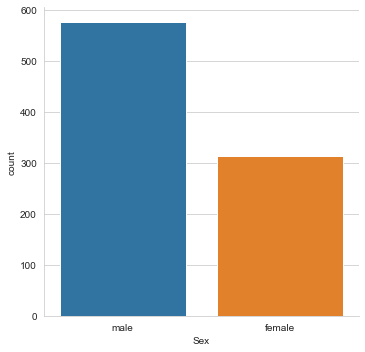

In [5]:
sns.factorplot("Sex", data=df, kind="count")

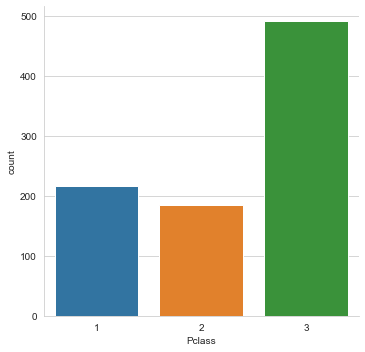

In [6]:
sns.factorplot('Pclass', data=df, kind="count")

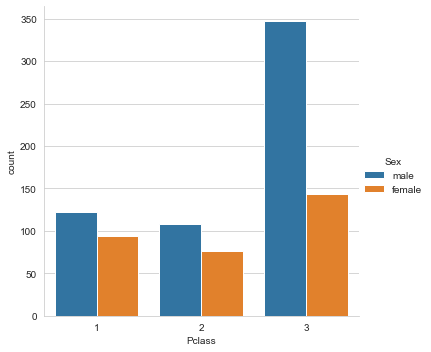

In [7]:
sns.factorplot("Pclass", data=df, hue="Sex", kind="count")

In [8]:
def titanic_children(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return sex
df["person"] = df[["Age", "Sex"]].apply(titanic_children, axis=1)

In [9]:
df["person"].unique()

array(['male', 'female', 'child'], dtype=object)

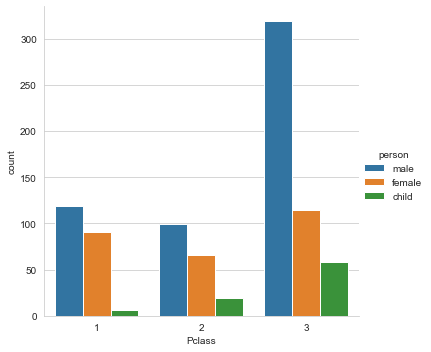

In [10]:
sns.factorplot("Pclass", data=df, hue="person", kind="count")

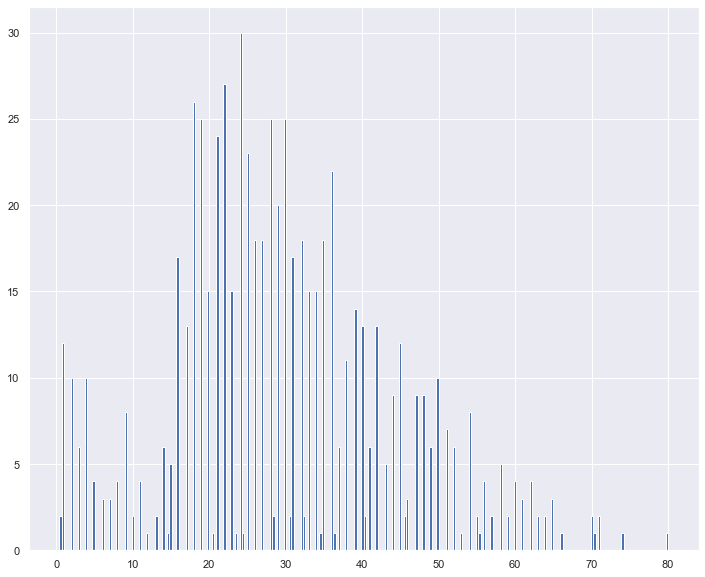

In [11]:
sns.set(rc={"figure.figsize":(12, 10)})
df["Age"].hist(bins=260)

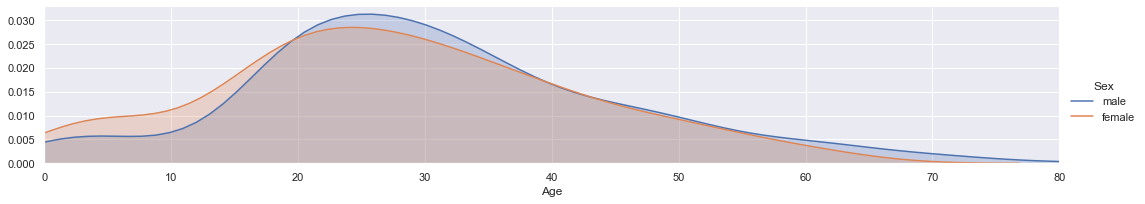

In [12]:
as_fig = sns.FacetGrid(df, hue="Sex", aspect=5)
as_fig.map(sns.kdeplot, "Age", shade=True)
oldest = df["Age"].max()
as_fig.set(xlim=(0, oldest))
as_fig.add_legend()

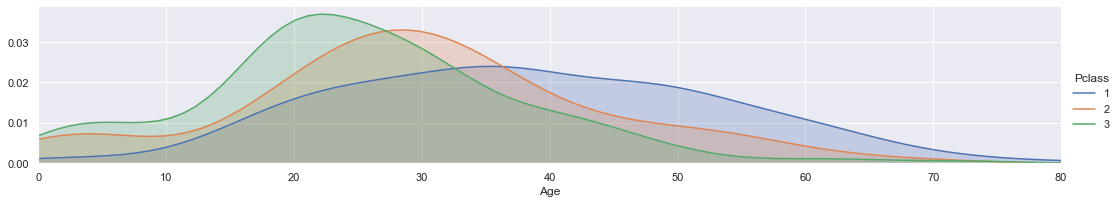

In [13]:
as_fig = sns.FacetGrid(df, hue="Pclass", aspect=5)
as_fig.map(sns.kdeplot, "Age", shade=True)
oldest = df["Age"].max()
as_fig.set(xlim=(0, oldest))
as_fig.add_legend()

In [14]:
df["Age"].mean()

29.69911764705882

In [15]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  person       891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 69.7+ KB


In [17]:
df.drop("Cabin", axis=1, inplace=True)

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
df["Embarked"] = df["Embarked"].fillna("S")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  person       891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [20]:
df.isnull().values.any()

False

c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


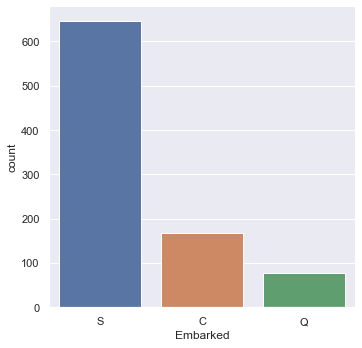

In [21]:
sns.factorplot("Embarked", data=df, kind="count")

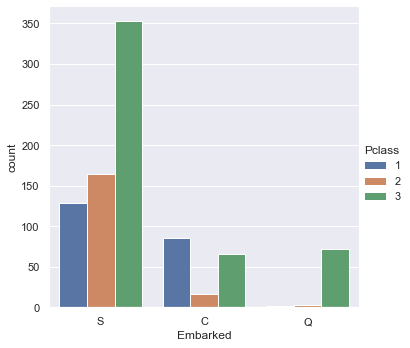

In [22]:
sns.factorplot("Embarked", data=df, hue="Pclass", kind="count")

In [23]:
df["Alone"] = df.Parch + df.SibSp
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  person       891 non-null    object 
 12  Alone        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 73.2+ KB


In [24]:
df["Alone"].loc[df["Alone"] > 0] = "With Family"
df["Alone"].loc[df["Alone"] == 0] = "Without Family"

c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [25]:
df["Alone"].unique()

array(['With Family', 'Without Family'], dtype=object)

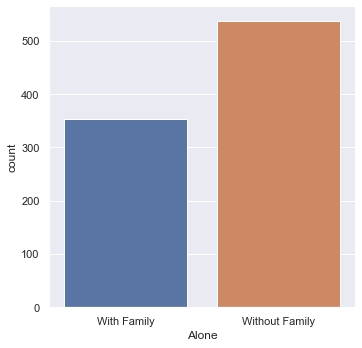

In [26]:
sns.factorplot("Alone", kind="count", data=df)

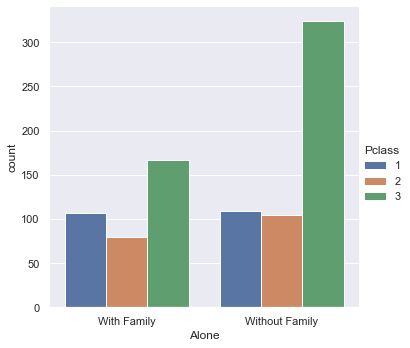

In [27]:
sns.factorplot("Alone", kind="count", data=df, hue="Pclass")

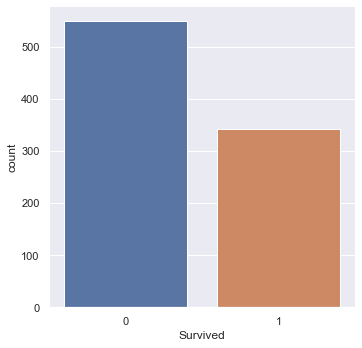

In [28]:
sns.factorplot("Survived", data=df, kind="count")

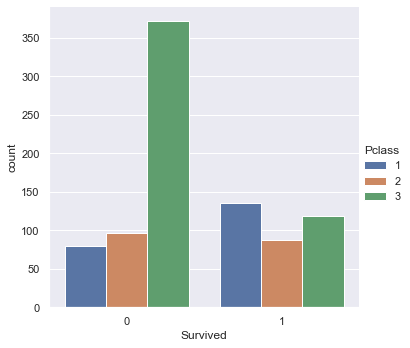

In [29]:
sns.factorplot("Survived", data=df, kind="count", hue="Pclass")

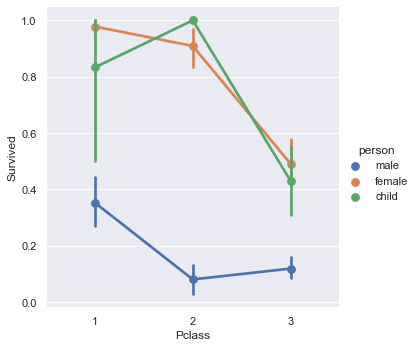

In [30]:
sns.factorplot("Pclass", "Survived", data=df, hue="person")

c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


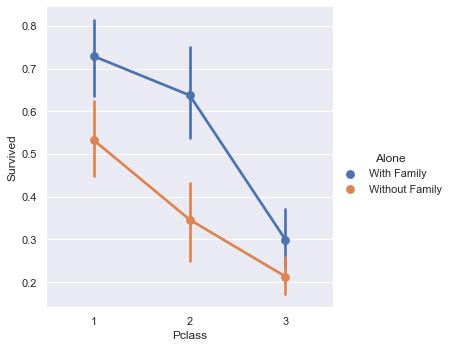

In [31]:
sns.factorplot("Pclass", "Survived", data=df, hue="Alone")

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female,Without Family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male,Without Family


In [33]:
df["Age"].unique().shape

(89,)

Text(0.5, 1.0, 'Correlation between features')

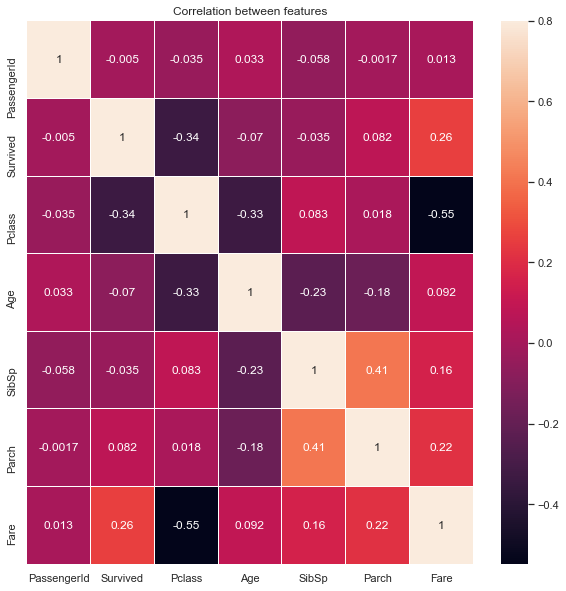

In [34]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr,vmax=.8, linewidth=0.01, annot=True, linecolor="white")
plt.title("Correlation between features")

In [35]:
person_dummies = pd.get_dummies(df["person"])
alone_dummies = pd.get_dummies(df["Alone"])
embarked_dummies = pd.get_dummies(df["Embarked"])
embarked_dummies.drop("Q", axis=1, inplace=True)

In [36]:
pclass_dummies = pd.get_dummies(df["Pclass"])
pclass_dummies.columns = ['class_1', 'class_2', 'class_3']
pclass_dummies.head()

,class_1,class_2,class_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [37]:
import math
df["Age"] = df["Age"].apply(math.ceil)
df['Fare'] = df["Fare"].apply(math.ceil)

In [38]:
df = pd.concat([df, pclass_dummies, person_dummies, alone_dummies, embarked_dummies], axis=1)

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,class_1,class_2,class_3,child,female,male,With Family,Without Family,C,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,8,...,0,0,1,0,0,1,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,72,...,1,0,0,0,1,0,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,8,...,0,0,1,0,1,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,54,...,1,0,0,0,1,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,9,...,0,0,1,0,0,1,0,1,0,1


In [40]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'person', 'Alone', 'class_1',
       'class_2', 'class_3', 'child', 'female', 'male', 'With Family',
       'Without Family', 'C', 'S'],
      dtype='object')

In [41]:
df.drop(["PassengerId", "Name", "Sex", "SibSp", "Parch", "Ticket", "Embarked"], axis=1, inplace=True)

In [42]:
df.drop(["person", "Alone", "Pclass", "Without Family", "male", "class_3"], axis=1, inplace=True)
df.head()

,Survived,Age,Fare,class_1,class_2,child,female,With Family,C,S
0,0,22,8,0,0,0,0,1,0,1
1,1,38,72,1,0,0,1,1,1,0
2,1,26,8,0,0,0,1,0,0,1
3,1,35,54,1,0,0,1,1,0,1
4,0,35,9,0,0,0,0,0,0,1


In [43]:
titanic_train = df.drop("Survived", axis=1)
titanic_survived = df.Survived

In [44]:
x_train, x_test, y_train, y_test = train_test_split(titanic_train, titanic_survived, test_size=0.2)

In [45]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)
train_survival = log_model.predict(x_test)

c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
print("Accuracy Score of logistic model is", metrics.accuracy_score(y_true=y_test, y_pred=train_survival))

Accuracy Score of logistic model is 0.7541899441340782


# Project 2

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
train = pd.read_csv("titanic1.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


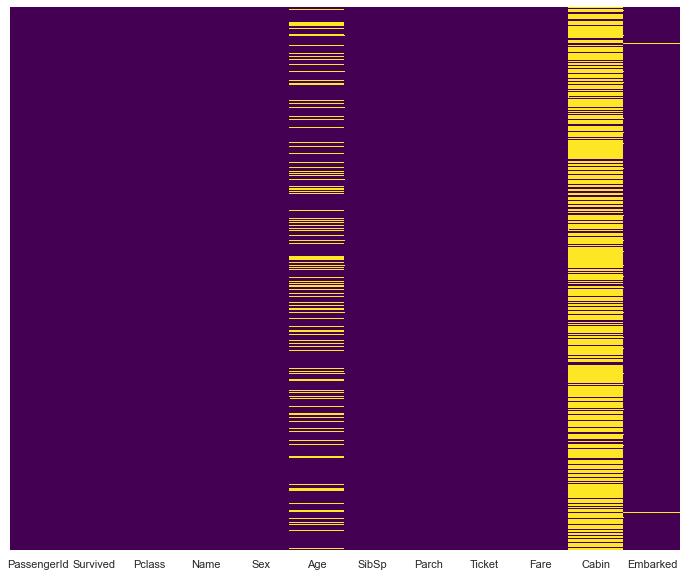

In [50]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

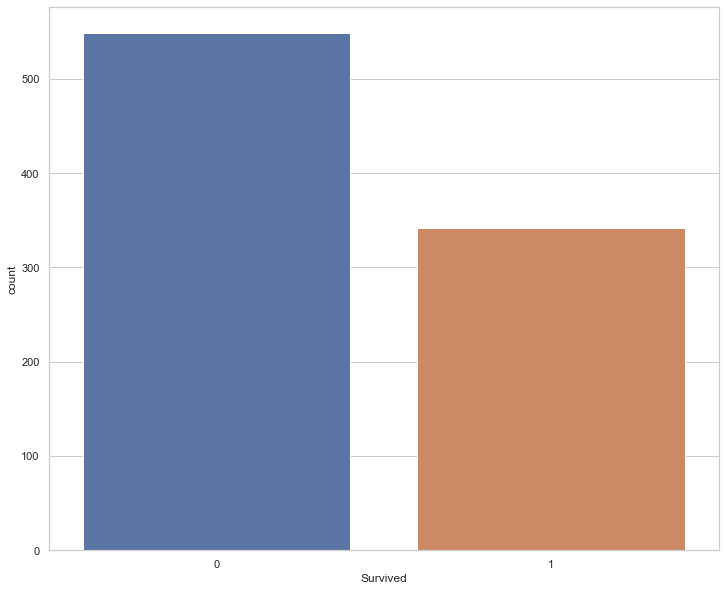

In [51]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=train)

c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


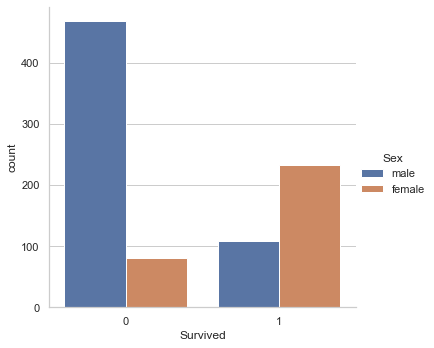

In [52]:
sns.factorplot("Survived", hue="Sex", kind="count", data=train)

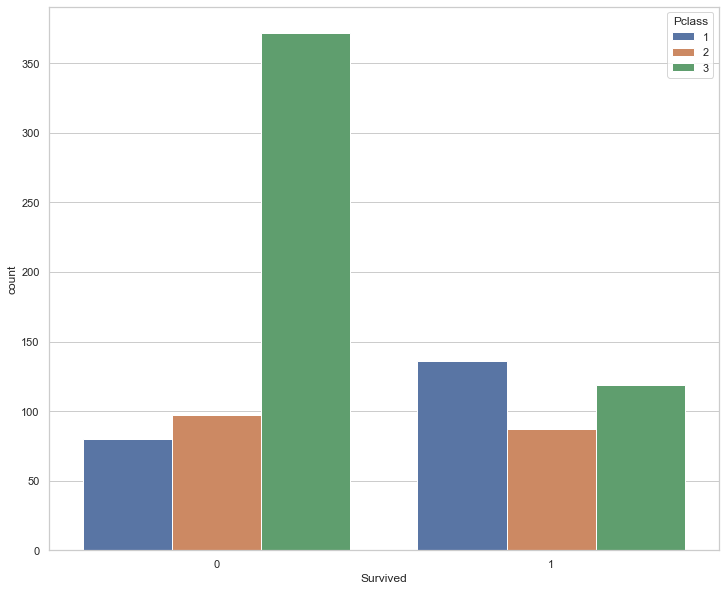

In [53]:
sns.countplot(x="Survived", hue="Pclass", data=train)

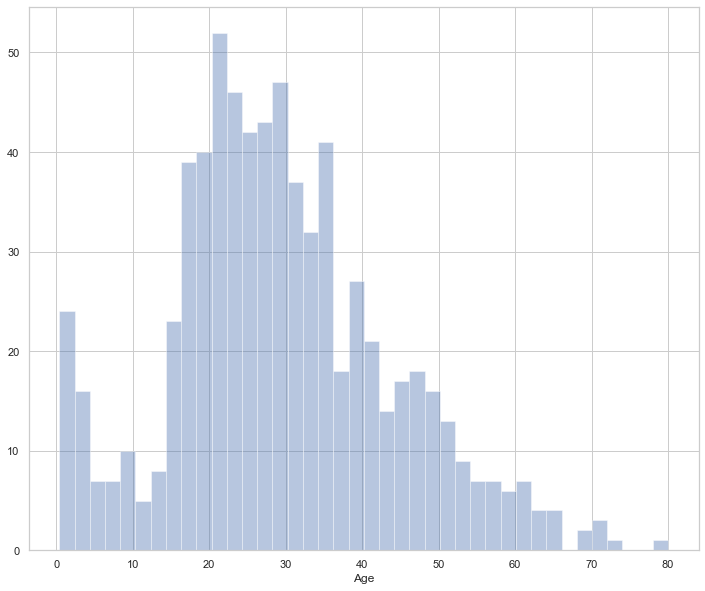

In [54]:
sns.distplot(train["Age"], kde=False, bins=40)

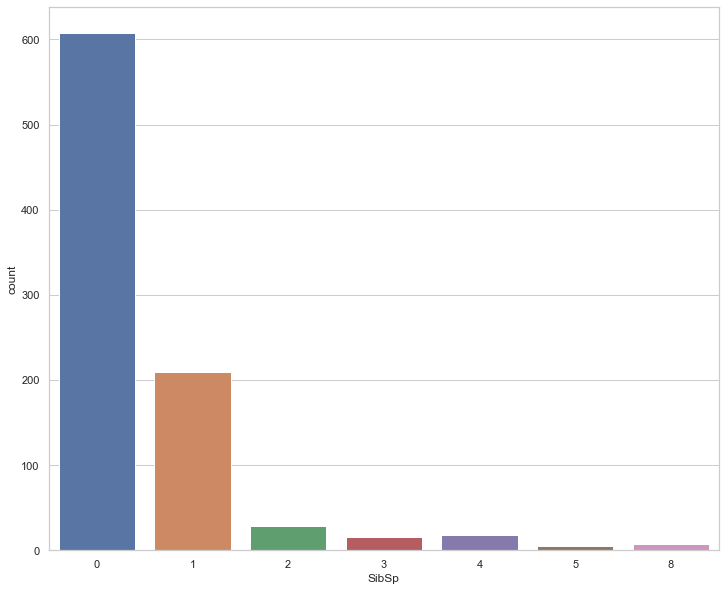

In [55]:
sns.countplot(x="SibSp", data=train)

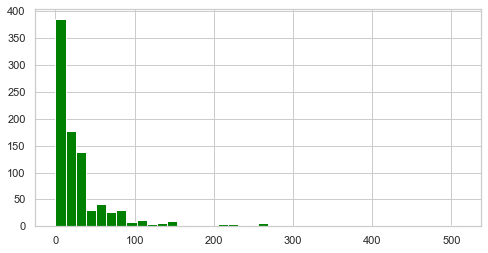

In [56]:
train["Fare"].hist(color="green", bins=40, figsize=(8, 4))

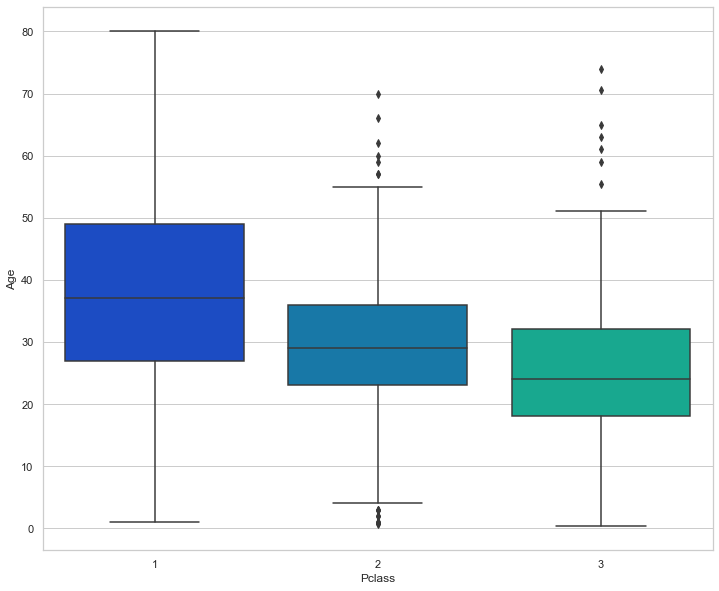

In [57]:
sns.boxplot(x="Pclass", y="Age", data=train, palette="winter")

In [58]:
def inpute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [59]:
train["Age"] = train[["Age", "Pclass"]].apply(inpute_age, axis=1)

In [60]:
train["Age"].isna().any()

False

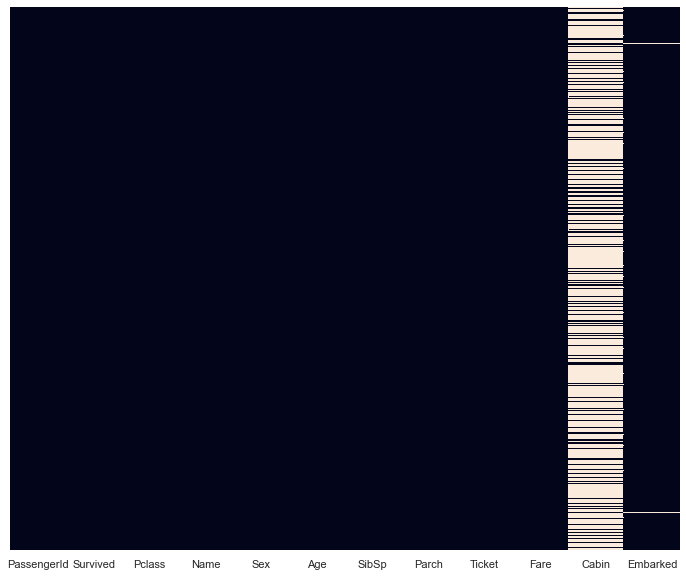

In [61]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [62]:
train.drop("Cabin", axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


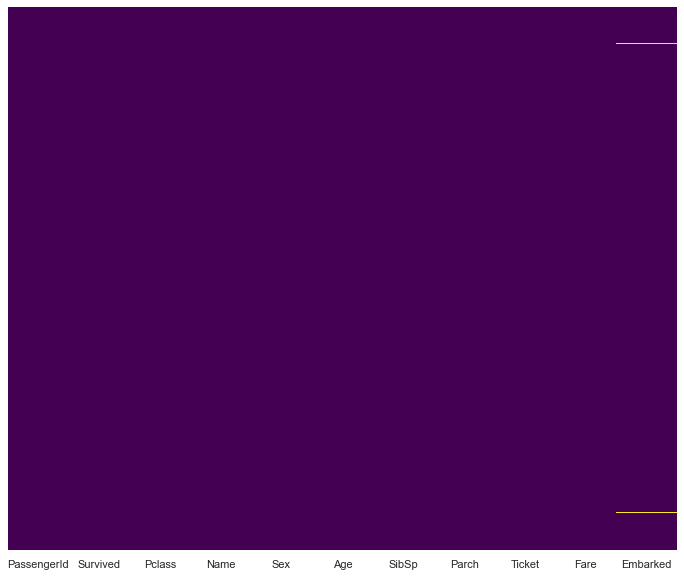

In [63]:
sns.heatmap(train.isnull(), cmap="viridis", yticklabels=False, cbar=False)

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 62.7+ KB


In [65]:
pd.get_dummies(train["Embarked"], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [66]:
sex = pd.get_dummies(train["Sex"], drop_first=True)
embark = pd.get_dummies(train["Embarked"], drop_first=True)

In [67]:
train.drop(["Embarked", "Sex", "Name", "Ticket"], axis=1, inplace=True)

In [68]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [69]:
train = pd.concat([train, sex, embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [70]:
train.drop("Survived", axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [71]:
train.Survived.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train, x_test, y_train, y_test = train_test_split(train.drop("Survived", axis=1), train["Survived"], test_size=0.3)

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
logmodel=LogisticRegression()
logmodel.fit(x_train, y_train)

c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
predictions = logmodel.predict(x_test)

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
accuracy = confusion_matrix(y_test, predictions)
accuracy

array([[147,  19],
       [ 30,  72]], dtype=int64)

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8171641791044776

In [81]:
predictions

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int64)

#  Project 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.shape

(51717, 17)

In [4]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
feature_na = [feature for feature in df.columns if df[feature].isnull().sum() > 0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [7]:
df.dropna(axis="index",subset=["rate"],inplace=True)
df.shape

(43942, 17)

In [8]:
def split_value(value):
    return value.split("/")[0]

In [9]:
df["rate"]=df.rate.apply(split_value)
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [10]:
df.replace(["NEW", "-"], 0, inplace=True)

In [11]:
df["rate"]=df["rate"].astype(float)

In [12]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\jatin\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0, flags=flags)


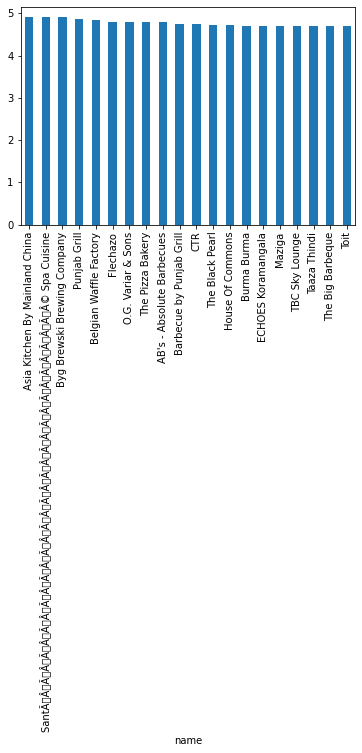

In [13]:
df.groupby("name")["rate"].mean().nlargest(20).plot.bar()

In [14]:
df_rate = df.groupby("name")["rate"].mean().to_frame()
df_rate=df_rate.reset_index()
df_rate.rename(columns={"name":"resturants", "rate":"rating"}, inplace=True)
df_rate.head(20)

,resturants,rating
0,#FeelTheROLL,3.400000
1,#L-81 Cafe,3.900000
2,#refuel,3.700000
3,1000 B.C,3.200000
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
5,11 to 11 Express Biriyanis,3.500000
6,1131 Bar + Kitchen,4.500000
7,12th Main - Grand Mercure,4.100000
8,1441 Pizzeria,4.100000
9,1522 - The Pub,4.212000


In [15]:
sns.set()

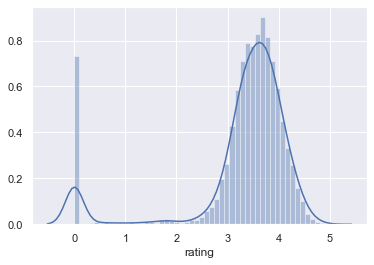

In [16]:
sns.distplot(df_rate["rating"])

Text(0.5, 0, 'Number of outlets')

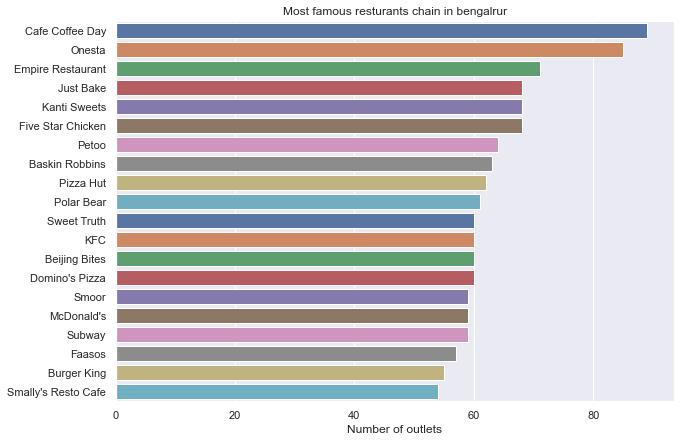

In [17]:
plt.figure(figsize=(10, 7))
chains = df["name"].value_counts()[0:20]
sns.barplot(x=chains, y=chains.index, palette="deep")
plt.title("Most famous resturants chain in bengalrur")
plt.xlabel("Number of outlets")

([<matplotlib.patches.Wedge at 0x1c32c9d0>,
 [Text(-0.481488774517003, 0.9890240442042423, 'accepted'),
  Text(0.5252605823084886, -1.0789352717716423, 'not accepted')],
 [Text(-0.26263024064563795, 0.5394676604750411, '64.4%'),
  Text(0.30640200634661835, -0.629378908533458, '35.6%')])

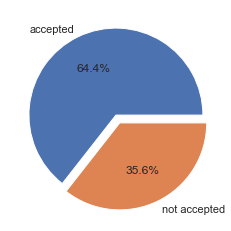

In [18]:
x = df["online_order"].value_counts()
labels = ["accepted", "not accepted"]
plt.pie(x, explode=[0.0, 0.1], autopct="%1.1f%%", labels=labels)

([<matplotlib.patches.Wedge at 0x1c35c160>,
 [Text(-0.9856961240827233, 0.4882654513359477, 'not book'),
  Text(1.0753048626356982, -0.5326532196392153, 'book')],
 [Text(-0.537652431317849, 0.26632660981960776, '85.4%'),
  Text(0.6272611698708239, -0.31071437812287556, '14.6%')])

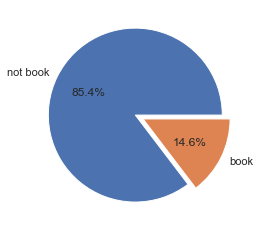

In [19]:
x = df["book_table"].value_counts()
labels = ["not book", "book"]
plt.pie(x, explode=[0.0, 0.1], autopct="%1.1f%%", labels=labels)

In [20]:
df["rest_type"].isna().sum()

151

In [21]:
df["rest_type"].dropna(inplace=True)

In [22]:
df["rest_type"].isna().sum()

0

In [23]:
len(df["rest_type"].unique())

87

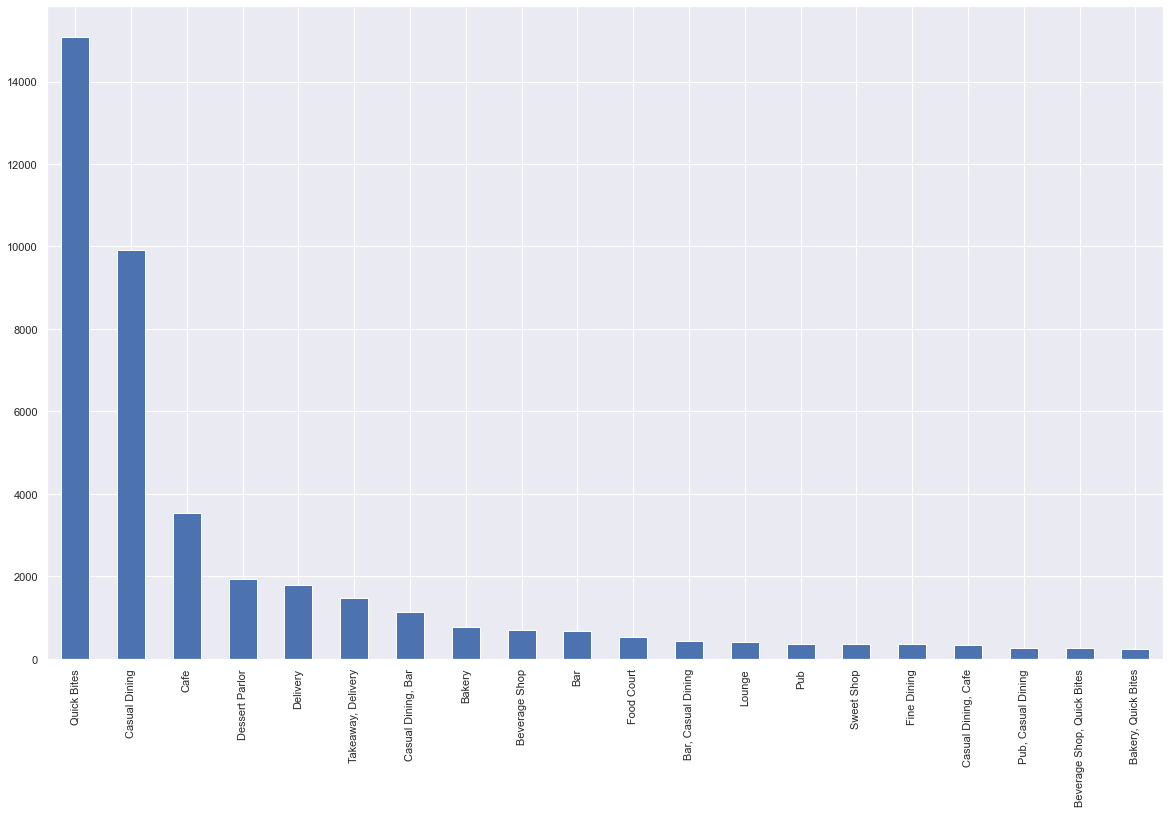

In [24]:
plt.figure(figsize=(20, 12))
df["rest_type"].value_counts().nlargest(20).plot.bar()


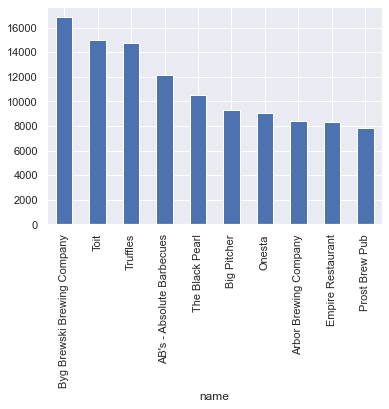

In [25]:
df.groupby("name")["votes"].max().nlargest(10).plot.bar()

In [26]:
df.groupby("location")["name"].unique()

location
BTM                  [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari         [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Banaswadi            [Cafe Nibras, The Sanctuary, Crunch Pizzas, Pi...
Bannerghatta Road    [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi         [Grand Village, Timepass Dinner, Srinathji's C...
                                           ...                        
West Bangalore       [FreshMenu, Fit Dish Fetish, Garden City Mobil...
Whitefield           [Imperio Cafe, Night Diaries, LocalHost, AB's ...
Wilson Garden        [Tree Top, Sahana's (Nati Style), Karavali Kol...
Yelahanka            [Prashanth Naati Corner, Cheta's Kitchen, Twis...
Yeshwantpur          [Chef's Bank, New Agarwal Bhavan, Fishing Boat...
Name: name, Length: 92, dtype: object

In [27]:
restaurants = []
locations = []
for key, locations_df in df.groupby("location"):
    locations.append(key)
    restaurants.append(len(locations_df["name"].unique()))

In [29]:
df_total = pd.DataFrame(zip(locations, restaurants))
df_total.columns = ["locations", "restaurants"]
df_total.set_index("locations", inplace=True)
df_total.sort_values(by="restaurants").tail(10)

,restaurants
locations,
Bellandur,284
Jayanagar,311
Bannerghatta Road,362
JP Nagar,400
Indiranagar,467
Electronic City,518
Marathahalli,525
HSR,553
BTM,581


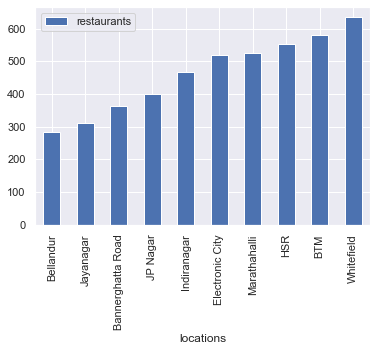

In [31]:
df_total.sort_values(by="restaurants").tail(10).plot.bar()

In [32]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            832
location                           0
rest_type                        151
dish_liked                     20333
cuisines                          11
approx_cost(for two people)      252
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [33]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [34]:
(df["rest_type"].value_counts()/len(df)) * 100

Quick Bites                   34.302035
Casual Dining                 22.582040
Cafe                           8.026489
Dessert Parlor                 4.412635
Delivery                       4.075827
                                ...    
Cafe, Food Court               0.004551
Food Court, Beverage Shop      0.004551
Dessert Parlor, Food Court     0.004551
Bakery, Food Court             0.004551
Quick Bites, Kiosk             0.002276
Name: rest_type, Length: 87, dtype: float64

Text(0.5, 0, 'Most popular cuisines of Bangalore')

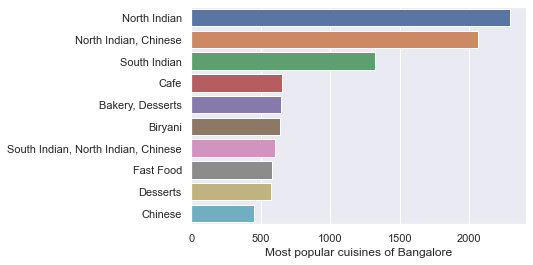

In [35]:
cuisines = df["cuisines"].value_counts()[:10]
sns.barplot(cuisines, cuisines.index)
plt.xlabel('Count')
plt.xlabel("Most popular cuisines of Bangalore")

In [37]:
len(df["approx_cost(for two people)"].value_counts())

66

In [38]:
df["approx_cost(for two people)"].isna().sum()

252

In [39]:
df.dropna(axis="index", subset=['approx_cost(for two people)'], inplace = True)

In [40]:
df["approx_cost(for two people)"].isna().sum()

0

In [41]:
df["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [42]:
df["approx_cost(for two people)"].dtype

dtype('O')

In [43]:
df["approx_cost(for two people)"] = df["approx_cost(for two people)"].apply(lambda x:x.replace(",", ""))

In [44]:
df["approx_cost(for two people)"] = df["approx_cost(for two people)"].astype(int)

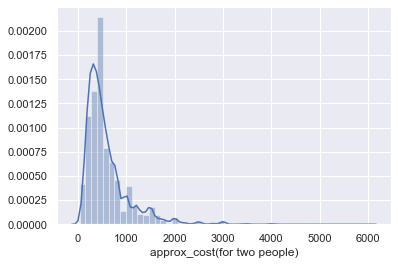

In [46]:
sns.distplot(df["approx_cost(for two people)"])

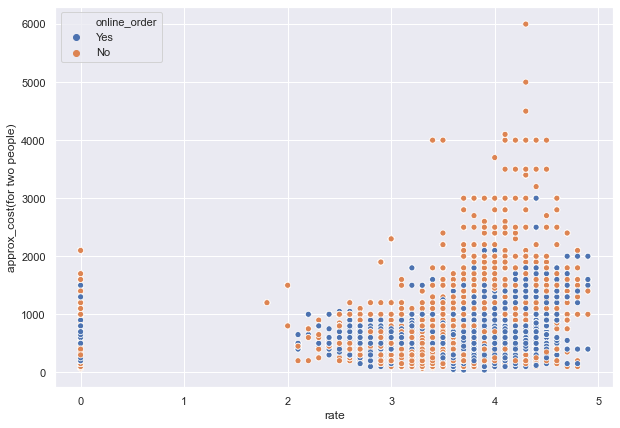

In [47]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x="rate", y="approx_cost(for two people)", hue="online_order", data=df)

In [48]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


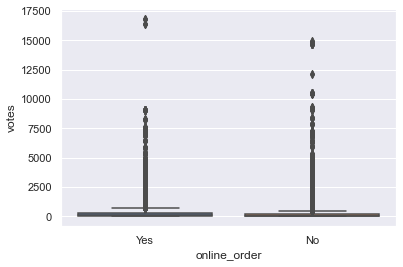

In [51]:
sns.boxplot(x="online_order", y = "votes", data=df)

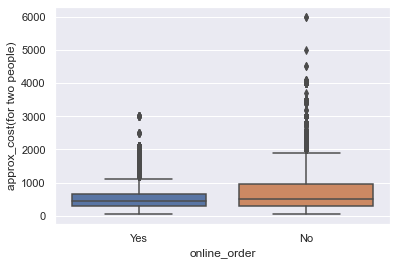

In [52]:
sns.boxplot(x="online_order", y="approx_cost(for two people)", data=df)

In [53]:
df["approx_cost(for two people)"].min()

40

In [54]:
df["approx_cost(for two people)"].max()

6000

In [55]:
df[df["approx_cost(for two people)"] == 6000]["name"]

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

In [56]:
df[df["approx_cost(for two people)"] == 6000].loc[:, ("name", "cuisines", "dish_liked")]

,name,cuisines,dish_liked
19139,Le Cirque Signature - The Leela Palace,"French, Italian","Wine, Asparagus Soup, Creme Brulee, Pasta, Rav..."
45618,Le Cirque Signature - The Leela Palace,"French, Italian","Wine, Asparagus Soup, Creme Brulee, Pasta, Rav..."


In [58]:
df[df["approx_cost(for two people)"] == 6000][["name", "cuisines", "dish_liked"]]

,name,cuisines,dish_liked
19139,Le Cirque Signature - The Leela Palace,"French, Italian","Wine, Asparagus Soup, Creme Brulee, Pasta, Rav..."
45618,Le Cirque Signature - The Leela Palace,"French, Italian","Wine, Asparagus Soup, Creme Brulee, Pasta, Rav..."


In [59]:
data = df.copy()

In [61]:
data.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)      int32
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [62]:
data.set_index("name", inplace=True)

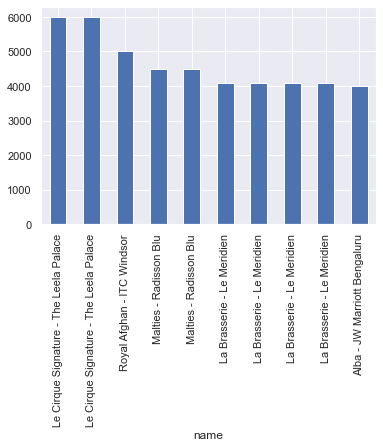

In [63]:
data["approx_cost(for two people)"].nlargest(10).plot.bar()

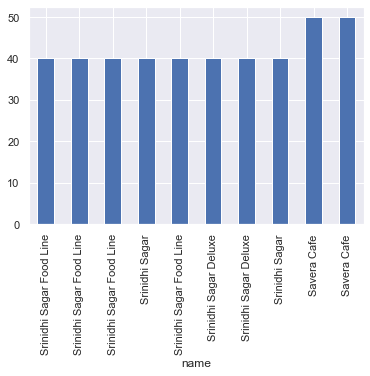

In [64]:
data["approx_cost(for two people)"].nsmallest(10).plot.bar()

In [65]:
data.set_index("location", inplace=True)
data["approx_cost(for two people)"].nsmallest(10)

location
Indiranagar         40
Indiranagar         40
Indiranagar         40
Old Airport Road    40
Indiranagar         40
Domlur              40
Domlur              40
Old Airport Road    40
Shivajinagar        50
Shivajinagar        50
Name: approx_cost(for two people), dtype: int32

In [66]:
data[data["approx_cost(for two people)"] <= 500]

,url,address,online_order,book_table,rate,votes,phone,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
location,,,,,,,,,,,,,,,
Banashankari,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7,88,+91 9620009302,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
Banashankari,https://www.zomato.com/bangalore/caf%C3%A9-dow...,"12,29 Near PES University Back Gate, D'Souza N...",Yes,No,4.1,402,080 26724489\r\n+91 7406048982,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari
Banashankari,https://www.zomato.com/bangalore/the-coffee-sh...,"6th Block, 3rd Stage, Banashankari, Bangalore",Yes,Yes,4.2,164,+91 9731644212,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500,"[('Rated 4.0', ""RATED\n Food - 4/5\nAmbience ...",[],Cafes,Banashankari
Banashankari,https://www.zomato.com/bangalore/caf-eleven-ba...,"111, Sapphire Toys Building, 100 Feet Ring Roa...",No,No,4.0,424,080 49577715,Cafe,"Sandwich, Omelette, Ice Tea, Virgin Mojito, Ho...","Cafe, Continental",450,"[('Rated 2.0', ""RATED\n This is a hookah cafe...",[],Cafes,Banashankari
Banashankari,https://www.zomato.com/bangalore/t3h-cafe-bana...,"504, CJ Venkata Das Road, Padmanabhangar, 2nd ...",No,No,3.9,93,+91 8884726600,Cafe,"Cheese Maggi, Peri Peri Fries, Pasta Arrabiata","Cafe, Italian, American",300,"[('Rated 4.0', ""RATED\n Happy to see such a c...",[],Cafes,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Brookefield,https://www.zomato.com/bangalore/venice-kerala...,"Opposite Brookfield Mall, Shiva Temple Road, B...",No,No,3.7,34,+91 8880059495,Quick Bites,NaN,Kerala,200,"[('Rated 5.0', 'RATED\n Loved this restaurant...",[],Dine-out,Whitefield
KR Puram,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",No,No,3.4,7,+91 9206260085\n+91 7619416923,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
Brookefield,https://www.zomato.com/bangalore/the-crunch-br...,"33/1, Kundalahalli Road, Brookefield, Bangalore",No,No,3.3,6,+91 9016277963,Beverage Shop,NaN,Beverages,300,"[('Rated 3.0', 'RATED\n the sandwich was not ...",[],Dine-out,Whitefield


In [68]:
df_budget = data[data["approx_cost(for two people)"] <= 500].loc[:, ("approx_cost(for two people)")]
df_budget = df_budget.reset_index()
df_budget.head()

,location,approx_cost(for two people)
0,Banashankari,300
1,Banashankari,500
2,Banashankari,500
3,Banashankari,450
4,Banashankari,300


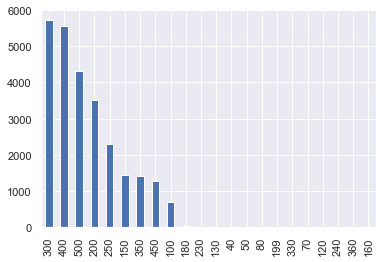

In [69]:
df_budget["approx_cost(for two people)"].value_counts().plot.bar()

In [70]:
df[(df["rate"] >=4) & (df["approx_cost(for two people)"] <= 500)].shape

(4007, 17)

In [72]:
df_new = df[(df["rate"] >= 4) & (df["approx_cost(for two people)"] <= 500)]
len(df_new["name"].unique())

628

In [73]:
location = []
total = []
for loc, location_df in df_new.groupby("location"):
    location.append(loc)
    total.append(len(location_df["name"].unique()))

In [74]:
len(location)

68

In [75]:
len(total)

68

In [77]:
location_df = pd.DataFrame(zip(location, total), columns=["location", "retaurant"])
location_df.set_index("location", inplace=True)

In [78]:
location_df.head(20)

,retaurant
location,
BTM,54
Banashankari,25
Banaswadi,3
Bannerghatta Road,19
Basavanagudi,31
Basaveshwara Nagar,3
Bellandur,20
Brigade Road,11
Brookefield,16


In [84]:
type(location)

list

Text(0, 0.5, 'total restaurants')

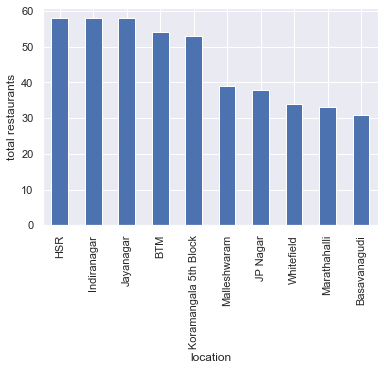

In [87]:
location_df["retaurant"].nlargest(10).plot.bar()
plt.ylabel("total restaurants")

In [88]:
location = []
total = []
for loc, location_df in df_new.groupby("location"):
    location.append(loc)
    total.append(location_df["name"].unique())

In [90]:
afford = pd.DataFrame(zip(location, total), columns=["location", "res_names"])
afford.set_index("location", inplace=True)
afford.head(10)

,res_names
location,
BTM,"[eat.fit, Hiyar Majhe Kolkata, XO Belgian Waff..."
Banashankari,[CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The ...
Banaswadi,"[Pooja Dosa Camp, Corner House Ice Cream, The ..."
Bannerghatta Road,"[BOX8- Desi Meals, Krishna Kuteera, Krishna Ku..."
Basavanagudi,"[Kabab Magic, Sri Guru Kottureshwara Davangere..."
Basaveshwara Nagar,"[Stoned Monkey, Natural Ice Cream, Priyadarshi..."
Bellandur,"[The Salad Studio, Cafe Jezve, eat.fit, BOX8- ..."
Brigade Road,"[The Flying Squirrel, Trick Or Treat, Belgian ..."
Brookefield,"[Breads and Banter, Chai Galli, Madouk Cafe, K..."


In [93]:
def return_budget(location, restaurant):
    budget = df[(df["approx_cost(for two people)"] <= 400) & (df["location"] == location) & (df["rate"] > 4) & 
               (df["rest_type"] == restaurant)]
    return budget["name"].unique()

In [94]:
return_budget("BTM", "Quick Bites")

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

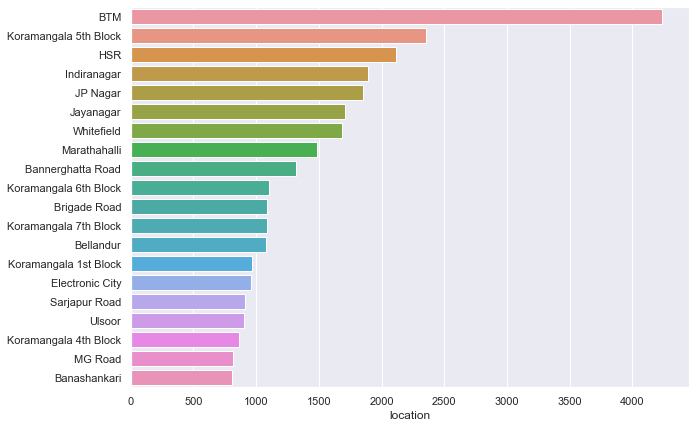

In [95]:
plt.figure(figsize=(10, 7))
Restaurant_locations = df["location"].value_counts()[:20]
sns.barplot(Restaurant_locations, Restaurant_locations.index)

In [96]:
df.shape

(43690, 17)

In [98]:
len(df["location"].unique())

92

In [99]:
location = pd.DataFrame({"Name":df["location"].unique()})

In [101]:
location["new_Name"] = "Bangalore " + location["Name"]

In [102]:
location.head()

,Name,new_Name
0,Banashankari,Bangalore Banashankari
1,Basavanagudi,Bangalore Basavanagudi
2,Mysore Road,Bangalore Mysore Road
3,Jayanagar,Bangalore Jayanagar
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout


In [106]:
from geopy.geocoders import Nominatim
lat_lon = []
geolocator = Nominatim(user_agent="app")
for loactions in location["Name"]:
    locations = geolocator.geocode(locations)
    if locations is None:
        lat_lon.append(np.nan)
    else:
        geo=(locations.latitude, locations.longitude)
        lat_lon.append(geo)

In [111]:
len(lat_lon)

92

In [112]:
location.shape

(92, 2)

In [113]:
location["geo_loc"] = lat_lon

In [114]:
location.head()

,Name,new_Name,geo_loc
0,Banashankari,Bangalore Banashankari,NaN
1,Basavanagudi,Bangalore Basavanagudi,"(44.933143, 7.540121)"
2,Mysore Road,Bangalore Mysore Road,"(44.933143, 7.540121)"
3,Jayanagar,Bangalore Jayanagar,"(44.933143, 7.540121)"
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout,"(44.933143, 7.540121)"


In [115]:
location.to_csv("zomato_location.csv", index=False)

In [117]:
Rest_locations = pd.DataFrame(df["location"].value_counts().reset_index())

In [118]:
Rest_locations.columns = ["Name", "count"]
Rest_locations.head()

,Name,count
0,BTM,4237
1,Koramangala 5th Block,2358
2,HSR,2113
3,Indiranagar,1892
4,JP Nagar,1849


In [119]:
location.head()

,Name,new_Name,geo_loc
0,Banashankari,Bangalore Banashankari,NaN
1,Basavanagudi,Bangalore Basavanagudi,"(44.933143, 7.540121)"
2,Mysore Road,Bangalore Mysore Road,"(44.933143, 7.540121)"
3,Jayanagar,Bangalore Jayanagar,"(44.933143, 7.540121)"
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout,"(44.933143, 7.540121)"


In [120]:
location.shape

(92, 3)

In [121]:
Rest_locations.shape

(92, 2)

In [123]:
Restaurant_locations = Rest_locations.merge(location, on="Name", how="left").dropna()
Restaurant_locations.head()

,Name,count,new_Name,geo_loc
0,BTM,4237,Bangalore BTM,"(44.933143, 7.540121)"
1,Koramangala 5th Block,2358,Bangalore Koramangala 5th Block,"(44.933143, 7.540121)"
2,HSR,2113,Bangalore HSR,"(44.933143, 7.540121)"
3,Indiranagar,1892,Bangalore Indiranagar,"(44.933143, 7.540121)"
4,JP Nagar,1849,Bangalore JP Nagar,"(44.933143, 7.540121)"


In [126]:
Restaurant_locations.shape

(91, 4)

In [127]:
type(Restaurant_locations["geo_loc"][0])

tuple

In [128]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [129]:
np.array(Restaurant_locations["geo_loc"])

array([(44.933143, 7.540121), (44.933143, 7.540121),
       (44.933143, 7.540121), (44.933143, 7.540121),
       (44.933143, 7.540121), (44.933143, 7.540121),
       (44.933143, 7.540121), (44.933143, 7.540121),
       (44.933143, 7.540121), (44.933143, 7.540121),
       (44.933143, 7.540121), (44.933143, 7.540121),
       (44.933143, 7.540121), (44.933143, 7.540121),
       (44.933143, 7.540121), (44.933143, 7.540121),
       (44.933143, 7.540121), (44.933143, 7.540121),
       (44.933143, 7.540121), (44.933143, 7.540121),
       (44.933143, 7.540121), (44.933143, 7.540121),
       (44.933143, 7.540121), (44.933143, 7.540121),
       (44.933143, 7.540121), (44.933143, 7.540121),
       (44.933143, 7.540121), (44.933143, 7.540121),
       (44.933143, 7.540121), (44.933143, 7.540121),
       (44.933143, 7.540121), (44.933143, 7.540121),
       (44.933143, 7.540121), (44.933143, 7.540121),
       (44.933143, 7.540121), (44.933143, 7.540121),
       (44.933143, 7.540121), (44.933143, 7.54

In [130]:
lat, lon = zip(*np.array(Restaurant_locations["geo_loc"]))
type(lat)

tuple

In [131]:
lat

(44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.933143,
 44.

In [132]:
Restaurant_locations["lat"] = lat
Restaurant_locations["lon"] = lon

In [133]:
Restaurant_locations.head()

,Name,count,new_Name,geo_loc,lat,lon
0,BTM,4237,Bangalore BTM,"(44.933143, 7.540121)",44.933143,7.540121
1,Koramangala 5th Block,2358,Bangalore Koramangala 5th Block,"(44.933143, 7.540121)",44.933143,7.540121
2,HSR,2113,Bangalore HSR,"(44.933143, 7.540121)",44.933143,7.540121
3,Indiranagar,1892,Bangalore Indiranagar,"(44.933143, 7.540121)",44.933143,7.540121
4,JP Nagar,1849,Bangalore JP Nagar,"(44.933143, 7.540121)",44.933143,7.540121


In [134]:
import folium
from folium.plugins import HeatMap
basemap = generateBaseMap()

In [135]:
basemap

In [136]:
Restaurant_locations[['lat', 'lon', 'count']].values.tolist()

[[44.933143, 7.540121, 4237.0],
 [44.933143, 7.540121, 2358.0],
 [44.933143, 7.540121, 2113.0],
 [44.933143, 7.540121, 1892.0],
 [44.933143, 7.540121, 1849.0],
 [44.933143, 7.540121, 1711.0],
 [44.933143, 7.540121, 1688.0],
 [44.933143, 7.540121, 1488.0],
 [44.933143, 7.540121, 1318.0],
 [44.933143, 7.540121, 1103.0],
 [44.933143, 7.540121, 1084.0],
 [44.933143, 7.540121, 1084.0],
 [44.933143, 7.540121, 1078.0],
 [44.933143, 7.540121, 964.0],
 [44.933143, 7.540121, 963.0],
 [44.933143, 7.540121, 913.0],
 [44.933143, 7.540121, 901.0],
 [44.933143, 7.540121, 864.0],
 [44.933143, 7.540121, 818.0],
 [44.933143, 7.540121, 745.0],
 [44.933143, 7.540121, 657.0],
 [44.933143, 7.540121, 628.0],
 [44.933143, 7.540121, 626.0],
 [44.933143, 7.540121, 607.0],
 [44.933143, 7.540121, 579.0],
 [44.933143, 7.540121, 574.0],
 [44.933143, 7.540121, 550.0],
 [44.933143, 7.540121, 522.0],
 [44.933143, 7.540121, 521.0],
 [44.933143, 7.540121, 493.0],
 [44.933143, 7.540121, 491.0],
 [44.933143, 7.540121, 487

In [139]:
HeatMap(Restaurant_locations[["lat", "lon", "count"]].values.tolist(), zoom=20, radius=15).add_to(basemap)

In [140]:
basemap

In [141]:
df1 = df.groupby(["rest_type", "name"]).agg("count")
df1

url  address  online_order  \
rest_type          name                                                      
Bakery             7th Heaven                     2        2             2   
                   A Little For Love              1        1             1   
                   Adarsh Bakery                  2        2             2   
                   Adi's Cake N Cafe              2        2             2   
                   Albert Bakery                  1        1             1   
...                                             ...      ...           ...   
Takeaway, Delivery Yumlane                        2        2             2   
                   Yumme Veg                      2        2             2   
                   Zamorin's Mappillah Biryani    1        1             1   
                   Zu's Doner Kebaps              1        1             1   
                   eat.fit                        2        2             2   

                                                book_table  rate  votes  \
rest_type          name                                                   
Bakery             7th Heaven                            2     2      2   
                   A Little For Love                     1     1      1   
                   Adarsh Bakery                         2     2      2   
                   Adi's Cake N Cafe                     2     2      2   
                   Albert Bakery                         1     1      1   
...                                                    ...   ...    ...   
Takeaway, Delivery Yumlane                               2     2      2   
                   Yumme Veg                             2     2      2   
                   Zamorin's Mappillah Biryani           1     1      1   
                   Zu's Doner Kebaps                     1     1      1   
                   eat.fit                               2     2      2   

                                                phone  location  dish_liked  \
rest_type          name                                                       
Bakery             7th Heaven                       2         2           0   
                   A Little For Love                1         1           0   
                   Adarsh Bakery                    2         2           0   
                   Adi's Cake N Cafe                2         2           0   
                   Albert Bakery                    1         1           1   
...                                               ...       ...         ...   
Takeaway, Delivery Yumlane                          2         2           0   
                   Yumme Veg                        2         2           0   
                   Zamorin's Mappillah Biryani      1         1           0   
                   Zu's Doner Kebaps                0         1           0   
                   eat.fit                          2         2           0   

                                                cuisines  \
rest_type          name                                    
Bakery             7th Heaven                          2   
                   A Little For Love                   1   
                   Adarsh Bakery                       2   
                   Adi's Cake N Cafe                   2   
                   Albert Bakery                       1   
...                                                  ...   
Takeaway, Delivery Yumlane                             2   
                   Yumme Veg                           2   
                   Zamorin's Mappillah Biryani         1   
                   Zu's Doner Kebaps                   1   
                   eat.fit                             2   

                                                approx_cost(for two people)  \
rest_type          name                                                       
Bakery             7th Heaven                                             2   
           

In [142]:
df1.sort_values(["url"], ascending=False)

url  address  online_order  \
rest_type           name                                              
Cafe                Cafe Coffee Day       89       89            89   
Casual Dining, Cafe Onesta                85       85            85   
Quick Bites         Five Star Chicken     67       67            67   
                    Domino's Pizza        60       60            60   
                    McDonald's            59       59            59   
...                                      ...      ...           ...   
                    New Students Corner    1        1             1   
Dessert Parlor      Mr Gola                1        1             1   
Casual Dining       Parijatha Paradise     1        1             1   
                    Parijatha Fish Land    1        1             1   
Delivery            SaJuSo                 1        1             1   

                                         book_table  rate  votes  phone  \
rest_type           name                                                  
Cafe                Cafe Coffee Day              89    89     89     86   
Casual Dining, Cafe Onesta                       85    85     85     85   
Quick Bites         Five Star Chicken            67    67     67     62   
                    Domino's Pizza               60    60     60     60   
                    McDonald's                   59    59     59     59   
...                                             ...   ...    ...    ...   
                    New Students Corner           1     1      1      1   
Dessert Parlor      Mr Gola                       1     1      1      1   
Casual Dining       Parijatha Paradise            1     1      1      1   
                    Parijatha Fish Land           1     1      1      1   
Delivery            SaJuSo                        1     1      1      1   

                                         location  dish_liked  cuisines  \
rest_type           name                                                  
Cafe                Cafe Coffee Day            89          31        89   
Casual Dining, Cafe Onesta                     85          85        85   
Quick Bites         Five Star Chicken          67          10        67   
                    Domino's Pizza             60          55        60   
                    McDonald's                 59          57        59   
...                                           ...         ...       ...   
                    New Students Corner         1           0         1   
Dessert Parlor      Mr Gola                     1           0         1   
Casual Dining       Parijatha Paradise          1           0         1   
                    Parijatha Fish Land         1           0         1   
Delivery            SaJuSo                      1           0         1   

                                         approx_cost(for two people)  \
rest_type           name                                               
Cafe                Cafe Coffee Day                               89   
Casual Dining, Cafe Onesta                                        85   
Quick Bites         Five Star Chicken                             67   
                    Domino's Pizza                                60   
                    McDonald's                                    59   
...                                                              ...   
                    New Students Corner                            1   
Dessert Parlor      Mr Gola                                        1   
Casual Dining       Parijatha Paradise                             1   
                    Parijatha Fish Land                            1   
Delivery            SaJuSo                                         1   

                                         reviews_list  menu_item  \
rest_type           name                                           
Cafe                Cafe Coffee Day                89         89   
Casual Dining, Cafe Ones

In [143]:
from wordcloud import WordCloud

In [144]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [145]:
df["update_dish_liked"] = df["dish_liked"].apply(lambda x: x.split(',') if type(x) == str else[""])

In [146]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),update_dish_liked
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,"[Pasta, Lunch Buffet, Masala Papad, Paneer ..."
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,"[Momos, Lunch Buffet, Chocolate Nirvana, Th..."
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,"[Churros, Cannelloni, Minestrone Soup, Hot ..."
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,[Masala Dosa]
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,"[Panipuri, Gol Gappe]"


In [147]:
from wordcloud import WordCloud, STOPWORDS

In [149]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            591
location                           0
rest_type                        149
dish_liked                     20216
cuisines                           8
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
update_dish_liked                  0
dtype: int64

In [150]:
df.dropna(axis="index", subset=["rest_type"], inplace=True)
df.dropna(axis="index", subset=["dish_liked"], inplace=True)

In [151]:
df.isna().sum()

url                              0
address                          0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
phone                          213
location                         0
rest_type                        0
dish_liked                       0
cuisines                         0
approx_cost(for two people)      0
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
update_dish_liked                0
dtype: int64

In [152]:
data = df[df["rest_type"] == "Quick Bites"]
data["dish_liked"]

3                                              Masala Dosa
31       Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...
34       Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...
40       Dabeli, Faluda, Masala Poori, Sandwiches, Tokr...
42                           Burgers, Fries, Hot Chocolate
                               ...                        
51598                          Potato Fries, Chicken Curry
51601    Rolls, Chicken Tikka Roll, Chicken Bhuna Roll,...
51617                               Coffee, Vada, Mla Dosa
51629                             Fish, Veg Thali, Biryani
51645                                              Burgers
Name: dish_liked, Length: 5269, dtype: object

#  Project 4

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [158]:
df = pd.read_csv("Car_sales.csv")
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
